<a href="https://colab.research.google.com/github/master-vsv/example-app-download/blob/main/Copy_of_Giga_Embeddings_01_public.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Локальная модель эмбедингов от Сбер-а: Giga-Embeddings-instruct

Сбер выложил модель эмбедингов на Hugging Face, это модеь `ai-sage/Giga-Embeddings-instruct`

Ссылки:

*   https://huggingface.co/ai-sage/Giga-Embeddings-instruct
*   https://gitverse.ru/GigaTeam/GigaEmbeddings
*   [YouTube: Дарья Хомич, Егор Колодин — Эмбеддинги на GigaChat](https://youtu.be/cIvGCaS4iWM?si=W8SFuB0BRs4vFdeC)







##0.Установка необходимых версий

In [ ]:
!pip uninstall transformers

Found existing installation: transformers 4.47.1
Uninstalling transformers-4.47.1:
  Would remove:
    /usr/local/bin/transformers-cli
    /usr/local/lib/python3.10/dist-packages/transformers-4.47.1.dist-info/*
    /usr/local/lib/python3.10/dist-packages/transformers/*
Proceed (Y/n)? Y
  Successfully uninstalled transformers-4.47.1


In [ ]:
!pip install transformers==4.42.4 # Необходимо для Giga-Embeddings-instruct
!pip install datasets==2.20.0     # Необходимо для Giga-Embeddings-instruct
!pip install langchain-community==0.3.13
!pip install faiss-gpu==1.7.2
# !pip install faiss-cpu==1.8.0.post1
!pip install langchain-gigachat==0.3.1
!pip install jq==1.7.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 54.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 60.4 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.21.0
    Uninstalling tokenizers-0.21.0:
      Successfully uninstalled tokenizers-0.21.0
INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 37.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.1/316.1 kB 27.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 18.9 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found e

##1.Запускаем пример:
https://gitverse.ru/GigaTeam/GigaEmbeddings

In [ ]:
import os
import torch
import torch.nn.functional as F
from transformers import AutoTokenizer, AutoModel

# Each query needs to be accompanied by an corresponding instruction describing the task.
task_name_to_instruct = {"example": "Given a question, retrieve passages that answer the question",}

query_prefix = task_name_to_instruct["example"] + "\nquestion: "
queries = [
    'are judo throws allowed in wrestling?',
    'how to become a radiology technician in michigan?'
]

# No instruction needed for retrieval passages
passage_prefix = ""
passages = [
    "Since you're reading this, you are probably someone from a judo background or someone who is just wondering how judo techniques can be applied under wrestling rules. So without further ado, let's get to the question. Are Judo throws allowed in wrestling? Yes, judo throws are allowed in freestyle and folkstyle wrestling. You only need to be careful to follow the slam rules when executing judo throws. In wrestling, a slam is lifting and returning an opponent to the mat with unnecessary force.",
    "Below are the basic steps to becoming a radiologic technologist in Michigan:Earn a high school diploma. As with most careers in health care, a high school education is the first step to finding entry-level employment. Taking classes in math and science, such as anatomy, biology, chemistry, physiology, and physics, can help prepare students for their college studies and future careers.Earn an associate degree. Entry-level radiologic positions typically require at least an Associate of Applied Science. Before enrolling in one of these degree programs, students should make sure it has been properly accredited by the Joint Review Committee on Education in Radiologic Technology (JRCERT).Get licensed or certified in the state of Michigan."
]

# load model with tokenizer
model = AutoModel.from_pretrained('ai-sage/Giga-Embeddings-instruct', trust_remote_code=True)

# get the embeddings
query_embeddings = model.encode(queries, instruction=query_prefix)
passage_embeddings = model.encode(passages, instruction=passage_prefix)

# normalize embeddings
query_embeddings = F.normalize(query_embeddings, p=2, dim=1)
passage_embeddings = F.normalize(passage_embeddings, p=2, dim=1)

scores = (query_embeddings @ passage_embeddings.T) * 100
print(scores.tolist())

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/3.43k [00:00<?, ?B/s]

configuration_gigarembed.py:   0%|          | 0.00/3.16k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/ai-sage/Giga-Embeddings-instruct:
- configuration_gigarembed.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_gigarembed.py:   0%|          | 0.00/18.8k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/ai-sage/Giga-Embeddings-instruct:
- modeling_gigarembed.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


model.safetensors.index.json:   0%|          | 0.00/20.3k [00:00<?, ?B/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/4.91G [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/4.93G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/271M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/47.8k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/7.02M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/72.0 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

We detected that you are passing `past_key_values` as a tuple and this is deprecated and will be removed in v4.43. Please use an appropriate `Cache` class (https://huggingface.co/docs/transformers/v4.41.3/en/internal/generation_utils#transformers.Cache)


[[73.53429412841797, 7.817770004272461], [14.838807106018066, 73.07014465332031]]


##2. Создаем кастомный класс GigaEmbeddings и функцию get_embeddings()

Нам нужна функция, которая вернет объект класса: `langchain_core.embeddings.embeddings.Embeddings`

In [ ]:
from typing import List
import torch
import torch.nn.functional as F
from transformers import AutoTokenizer, AutoModel
from langchain_core.embeddings.embeddings import Embeddings

class GigaEmbeddings(Embeddings):
    def __init__(self):
        # Загружаем модель и токенайзер
        self.model = AutoModel.from_pretrained('ai-sage/Giga-Embeddings-instruct',
                                               trust_remote_code=True,
                                              #  local_files_only=True
                                               )
        # Определяем инструкции для задач
        self.task_name_to_instruct = {
            "example": "Given a question, retrieve passages that answer the question"
        }
        self.query_prefix = self.task_name_to_instruct["example"] + "\nquestion: "
        self.passage_prefix = ""

    def embed_documents(self, texts: List[str]) -> List[List[float]]:
        # Получаем эмбеддинги документов
        embeddings = self.model.encode(texts, instruction=self.passage_prefix)
        # Нормализуем эмбеддинги
        embeddings = F.normalize(embeddings, p=2, dim=1)
        # Преобразуем в список списков
        return embeddings.tolist()

    def embed_query(self, text: str) -> List[float]:
        # Получаем эмбеддинг запроса
        embeddings = self.model.encode([text], instruction=self.query_prefix)
        # Нормализуем эмбеддинг
        embeddings = F.normalize(embeddings, p=2, dim=1)
        # Преобразуем в список
        return embeddings[0].tolist()

def get_embeddings():
    return GigaEmbeddings()

##3. Датасет для Базы Знаний

In [ ]:
dataset={
    "data": [
        {
            "id": 1,
            "name": "Товар 1",
            "description": "Уникальное описание товара 1",
            "price": 7390.61,
            "category": "Одежда",
            "availability": "Нет в наличии"
        },
        {
            "id": 2,
            "name": "Товар 2",
            "description": "Уникальное описание товара 2",
            "price": 7325.43,
            "category": "Книги",
            "availability": "Нет в наличии"
        },
        {
            "id": 3,
            "name": "Товар 3",
            "description": "Уникальное описание товара 3",
            "price": 3368.01,
            "category": "Одежда",
            "availability": "Под заказ"
        },
        {
            "id": 4,
            "name": "Товар 4",
            "description": "Уникальное описание товара 4",
            "price": 7170.35,
            "category": "Спорт",
            "availability": "Нет в наличии"
        },
        {
            "id": 5,
            "name": "Товар 5",
            "description": "Уникальное описание товара 5",
            "price": 5354.59,
            "category": "Книги",
            "availability": "В наличии"
        },
        {
            "id": 6,
            "name": "Товар 6",
            "description": "Уникальное описание товара 6",
            "price": 7759.11,
            "category": "Одежда",
            "availability": "Под заказ"
        },
        {
            "id": 7,
            "name": "Товар 7",
            "description": "Уникальное описание товара 7",
            "price": 3109.49,
            "category": "Дом и сад",
            "availability": "Нет в наличии"
        },
        {
            "id": 8,
            "name": "Товар 8",
            "description": "Уникальное описание товара 8",
            "price": 5020.22,
            "category": "Спорт",
            "availability": "Нет в наличии"
        },
        {
            "id": 9,
            "name": "Товар 9",
            "description": "Уникальное описание товара 9",
            "price": 3208.75,
            "category": "Электроника",
            "availability": "Под заказ"
        },
        {
            "id": 10,
            "name": "Товар 10",
            "description": "Уникальное описание товара 10",
            "price": 1604.91,
            "category": "Спорт",
            "availability": "Под заказ"
        }
    ]
}

In [ ]:
import json
# Задайте имя файла, в который вы хотите сохранить данные
file_name = 'dataset.json'

# Сохраняем данные в формате JSON
with open(file_name, 'w', encoding='utf-8') as json_file:
    json.dump(dataset, json_file, ensure_ascii=False, indent=4)

##4.Создание векторной Базы Знаний

In [ ]:
from langchain_community.document_loaders import JSONLoader
loader = JSONLoader(
    file_path=file_name,
    jq_schema='.data[]',
    text_content=False)
docs = loader.load()

In [ ]:
embeddings = get_embeddings()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/3.43k [00:00<?, ?B/s]

configuration_gigarembed.py:   0%|          | 0.00/3.16k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/ai-sage/Giga-Embeddings-instruct:
- configuration_gigarembed.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_gigarembed.py:   0%|          | 0.00/18.8k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/ai-sage/Giga-Embeddings-instruct:
- modeling_gigarembed.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


model.safetensors.index.json:   0%|          | 0.00/20.3k [00:00<?, ?B/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/4.91G [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/4.93G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/271M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/47.8k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/7.02M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/72.0 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
# Создание векторной Базы-Знаний
from langchain_community.vectorstores import FAISS
db = FAISS.from_documents(docs, embeddings)

We detected that you are passing `past_key_values` as a tuple and this is deprecated and will be removed in v4.43. Please use an appropriate `Cache` class (https://huggingface.co/docs/transformers/v4.41.3/en/internal/generation_utils#transformers.Cache)


##5.Получение релевантных чанков

In [ ]:
question= 'Есть ли у вас товар 9?'
# Поиск схожести
docs = db.similarity_search(question, k=3)
from pprint import pprint
pprint(docs)

[Document(id='c6f3efc5-a638-4216-8d44-f9709bff268d', metadata={'source': '/content/dataset.json', 'seq_num': 9}, page_content='{"id": 9, "name": "\\u0422\\u043e\\u0432\\u0430\\u0440 9", "description": "\\u0423\\u043d\\u0438\\u043a\\u0430\\u043b\\u044c\\u043d\\u043e\\u0435 \\u043e\\u043f\\u0438\\u0441\\u0430\\u043d\\u0438\\u0435 \\u0442\\u043e\\u0432\\u0430\\u0440\\u0430 9", "price": 3208.75, "category": "\\u042d\\u043b\\u0435\\u043a\\u0442\\u0440\\u043e\\u043d\\u0438\\u043a\\u0430", "availability": "\\u041f\\u043e\\u0434 \\u0437\\u0430\\u043a\\u0430\\u0437"}'),
 Document(id='07973643-240f-4e83-b32a-e927203ab5f1', metadata={'source': '/content/dataset.json', 'seq_num': 7}, page_content='{"id": 7, "name": "\\u0422\\u043e\\u0432\\u0430\\u0440 7", "description": "\\u0423\\u043d\\u0438\\u043a\\u0430\\u043b\\u044c\\u043d\\u043e\\u0435 \\u043e\\u043f\\u0438\\u0441\\u0430\\u043d\\u0438\\u0435 \\u0442\\u043e\\u0432\\u0430\\u0440\\u0430 7", "price": 3109.49, "category": "\\u0414\\u043e\\u043c \\

##6.Промпт

In [ ]:
prompt = f'''Ты администратор Телеграм канала
и ты отвечаешь на вопросы.
Ответь на вопрос пользователя.
Используй при этом только информацию из контекста.
Контекст: {docs}
Вопрос: {question}
Ответ:'''

##7.Запрос в GigaChat по API

###7.1.Авторизация

Предварительные действия, рекомендую выполнять в Яндекс Браузере и использовать Сбер ID:

1.   Зарегистрироваться здесь: https://developers.sber.ru/
2.   Создать проект "GigaChat API"
3.   В этом проекте получить значение **Authorization Key**
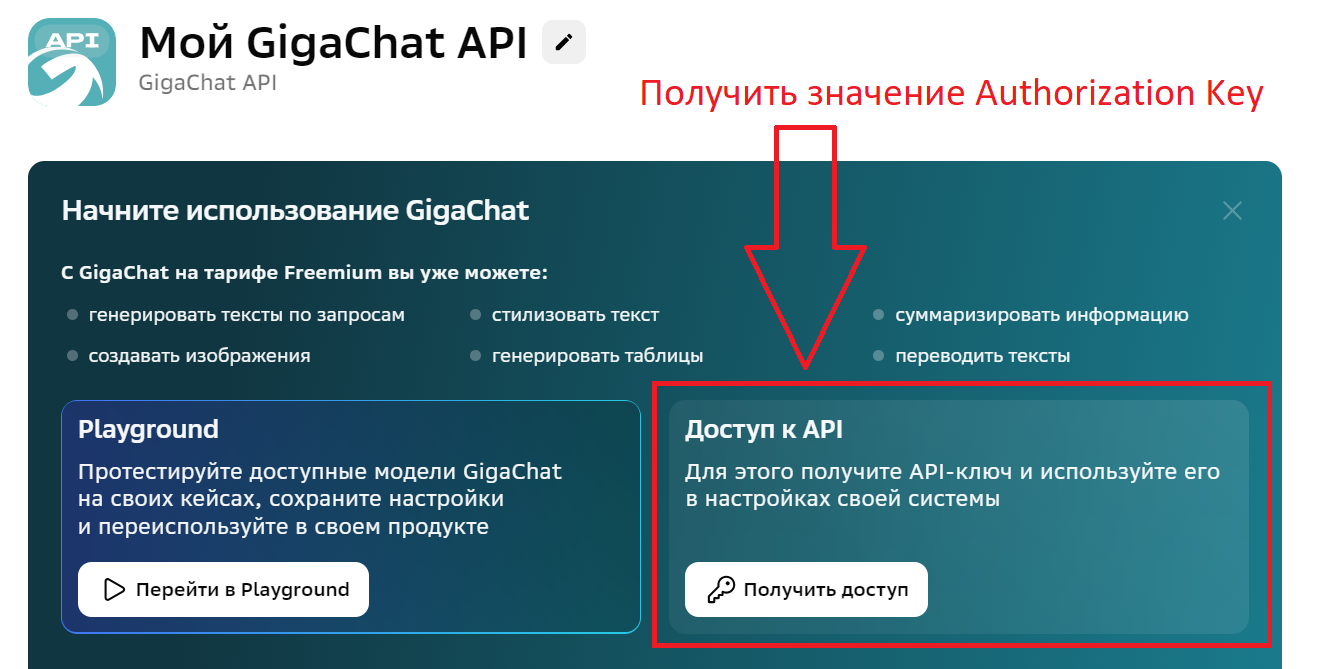

и сохранить его Secrets под именем **SBER_AUTH**
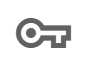



In [ ]:
from google.colab import userdata
auth = userdata.get('SBER_AUTH')
from langchain_gigachat.chat_models import GigaChat
# Авторизация в GigaChat
giga = GigaChat(
    credentials=auth,
    model="GigaChat:latest",
    # Отключает проверку наличия сертификатов НУЦ Минцифры
    verify_ssl_certs=False,
)

In [ ]:
res = giga.invoke(prompt)
print("GigaChat: ", res.content)

GigaChat:  Да, у нас есть товар №9 по цене 3208.75 руб.


Куда двигаться дальше: **GigaChat Lite**


*   https://gitverse.ru/GigaTeam/GigaChat
*   https://huggingface.co/ai-sage/GigaChat-20B-A3B-base



#Внимание:

1. Если вы испытываете проблемы с просмотром ранее опубликованного видео в связи с замедлением Youtube, пишите в кометы под нужным постом в Телеграм - и я залью туда это видео.
2. Приглашаю в Телеграм общаться по этой теме: https://t.me/AiExp01
3. Чат находится здесь: https://t.me/AiExp02
4. Что еще изучить и посмотреть:

*   [GigaChat](https://www.youtube.com/watch?v=Y0bJjG_U4y0&list=PLAzpexGM7Jain-HzWb324xj72SPSMGWq_)

*   [Концепты использования AI Agents](https://www.youtube.com/watch?v=qlVX4i1ztW4&list=PLAzpexGM7JajamgkiOR3TLwCXlT5oSC1E)

* [Концепты использования OpenAI API](https://www.youtube.com/watch?v=FoLquyNFE_c&list=PLAzpexGM7JagNMDIWUsoO8fbTwbY82ZEN)

*   [Концепты использования RAG (Retrieval-Augmented Generation)](https://www.youtube.com/watch?v=NkjkqsLCweQ&list=PLAzpexGM7Jai1qgfxMkY-6ivOft-7dh8Q)

*   [LlamaIndex](https://www.youtube.com/watch?v=myGdYwP83D8&list=PLAzpexGM7JahXip0jNyDEJwPj-wySj3Ix)